In [13]:
import numpy
import random as rand
import matplotlib.pyplot as plt

In [ ]:
rand.seed(42)
qstar_list = numpy.random.normal(0, 1, 10)
optimal_action = numpy.argmax(qstar_list)

In [122]:
qstar_list # OPTIMAL ACTION = 6

[0.557707193831535,
 -1.8999569791093323,
 -0.899882726523523,
 -1.107157047404709,
 0.9458848566560496,
 0.7067979496916452,
 1.5687182708193816,
 -1.6522446694823354,
 -0.3123127212589183,
 -1.8808111222477186]

In [123]:
qstar_rewards = [numpy.random.normal(mean, 1, 2000) for mean in qstar_list]

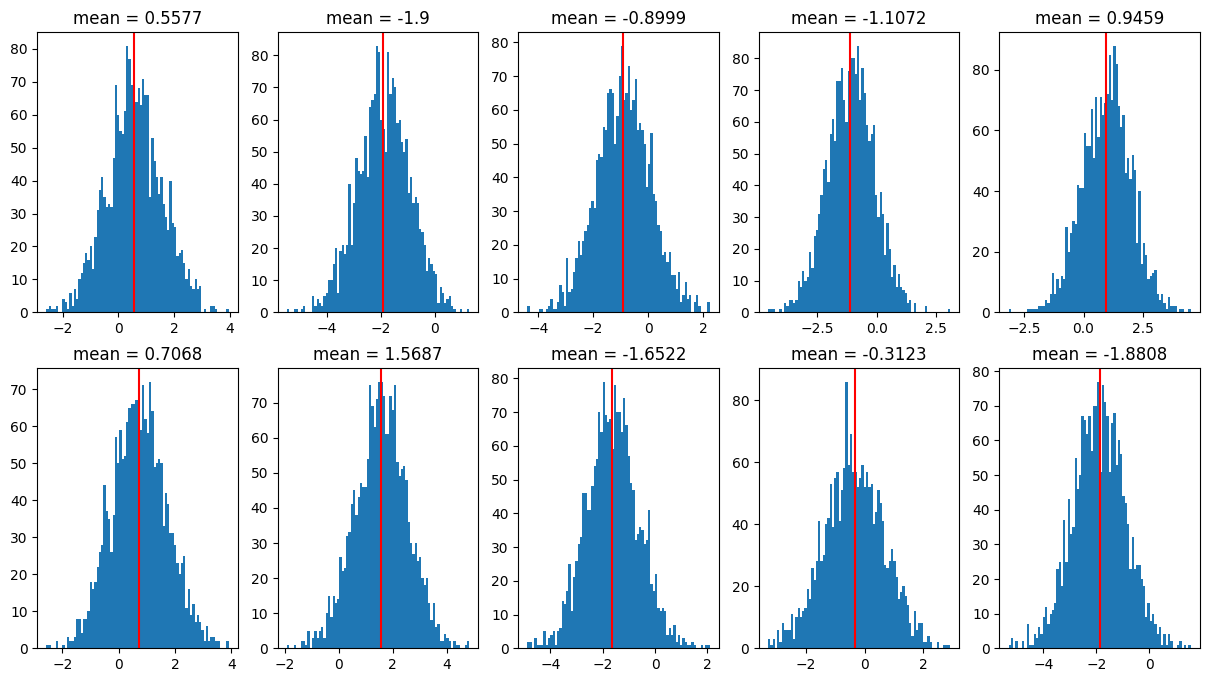

In [124]:
fig, ax = plt.subplots(2,5, figsize=(15,8))
for i in range(10):
    ax[i//5, i%5].hist(qstar_rewards[i], 80)
    ax[i//5, i%5].axvline(qstar_list[i], color='red')
    ax[i//5, i%5].set_title(f"mean = {round(qstar_list[i], 4)}")
plt.show()

In [72]:
def av_estimate(curr_est, new_reward):
    return (curr_est[0]+new_reward)/curr_est[1]

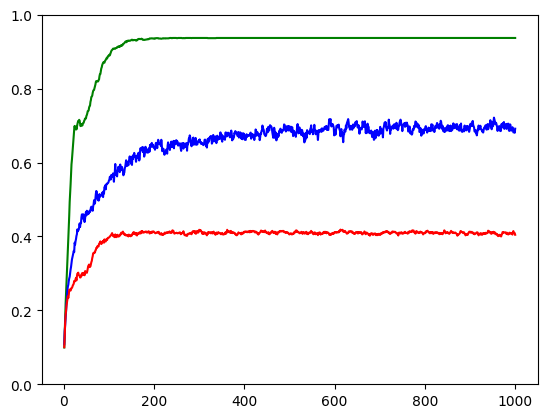

In [140]:
for epsilon in zip([0, 0.1, 0.01], ['green', 'blue', 'red']):
    qstar_list = numpy.random.normal(0, 1, 10)
    E = epsilon[0]
    STEPS = 1000
    RUNS = 2000
    OPTIMAL_ACTION = numpy.argmax(qstar_list)
    q_mean_est = [0 for _ in range(10)]
    optimal_action_count = numpy.zeros(STEPS)
    reward_mean = numpy.zeros(STEPS)

    def e_Greedy_method(q_estimates, step):
        global optimal_action_count, reward_mean
        if rand.random() < E: #EXPLORATORY
            action_chosen = rand.randint(0,len(q_estimates)-1)

        else: #GREEDY
            best_value = max([q[0] for q in q_estimates])
            best_actions = [i for i, q in enumerate(q_estimates) if q[0] == best_value]
            action_chosen = rand.choice(best_actions)
        
        if action_chosen == OPTIMAL_ACTION:
            optimal_action_count[step] += 1/RUNS
        reward = numpy.random.normal(qstar_list[action_chosen], 1, 1).item()
        reward_mean[step] += reward/RUNS
        q_estimates[action_chosen][1] += 1
        q_estimates[action_chosen][0] = av_estimate(q_estimates[action_chosen], reward)

    # 1000 iterations
    for _ in range(RUNS):
        q_estimates = [[0, 0] for _ in range(10)]
        for step in range(STEPS):
            e_Greedy_method(q_estimates, step)

    plt.ylim(0,1)
    plt.plot(range(1, 1001), optimal_action_count, color=epsilon[1])
plt.show()

In [ ]:
#E = 0.01 STEPS = 1000 RUNS = 2000 MEDIA MELHOR ACAO 105
#E = 0.1 STEPS = 1000 RUNS = 2000 MEDIA MELHOR ACAO 142
#E = 0 STEPS = 1000 RUNS = 2000 MEDIA MELHOR ACAO 100